In [53]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [5]:
# Linear algebra vector:
row_vec = np.array([4,2])
col_vec = np.array([[-2],[3]])

print(row_vec)
print(col_vec)

[4 2]
[[-2]
 [ 3]]


In [9]:
# sym.sympify() turns np obj into sym
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

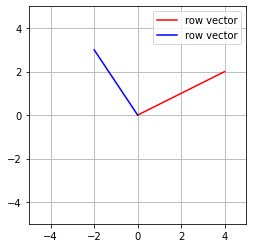

In [12]:
plt.plot([0,row_vec[0]],[0,row_vec[1]],'r',label='row vector')
plt.plot([0,col_vec[0]],[0,col_vec[1]],'b',label='col vector')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()
plt.legend()
plt.show()

In [13]:
from sympy.plotting import plot3d

r_vec = np.array([3,0,-4])
c_vec = np.array([-1,1,3])

plt.plot3d([0,r_vec[0]],[0,r_vec[1]],[0,r_vec[2]],'r',label='row vector')
plt.plot3d([0,c_vec[0]],[0,c_vec[1]],[0,c_vec[2]],'b',label='col vector')


AttributeError: module 'matplotlib.pyplot' has no attribute 'plot3d'

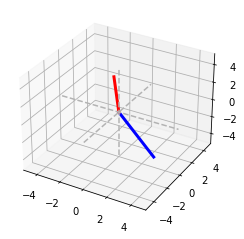

In [17]:
v = np.array([3,0,-4])
w = np.array([-1,1,3])

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0,v[0]],[0,v[1]],[0,v[2]],'b',linewidth=3)
ax.plot([0,w[0]],[0,w[1]],[0,w[2]],'r',linewidth=3)

ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.show()

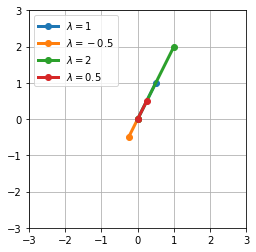

In [18]:
# Vector/Scalar Multiplication-
v = np.array([.5,1])
s = [1,-.5,2,.5]

for si in s:
    sv = si*v
    plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='$\\lambda=%g$' %si)
    
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.grid()
plt.legend()
plt.show()


In [19]:
# Vector/Scalar Addition
v1 = np.array([-1,2])
v2 = np.array([1,1])
v3a = v1+v2
v3b = np.add(v1,v2)
v3c = np.zeros(2)

for i in range(0,2):
    v3c[i] = v1[i] + v2[i]
    
print(v3a,v3b,v3c)

[0 3] [0 3] [0. 3.]


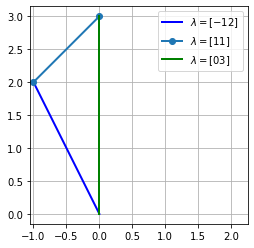

In [27]:
#Lect 137, my ans-
u = np.array([-1,2])
i = np.array([1,1])
k = u+i

# s1 = sym.latex(sym.sympify(v1))
# display(Math('%s+%s=%s' %(s1,s2,s3)))

plt.plot([0,u[0]],[0,u[1]],'b-',linewidth=2,label='$\\lambda=%s$' %u)
# plt.plot([0,i[0]]+u[0],[0,i[1]]+u[1],'o-',linewidth=2,label='$\\lambda=%s$' %i)
plt.plot([u[0],k[0]],[u[1],k[1]],'o-',linewidth=2,label='$\\lambda=%s$' %i)
plt.plot([0,k[0]],[0,k[1]],'g-',linewidth=2,label='$\\lambda=%s$' %k)


plt.legend()
plt.axis('square')
plt.grid()
plt.show()

In [33]:
#THE DOT PRODUCT-
#arange is an array range, start, end, evenly-spaced steps
v = np.arange(10,20,3) #20,21,22 all produce same 4 numbers
w = np.arange(5,15,3)

print(v)
print(w)

#Algorithm for computing DOT PRODUCT:
dp1 = 0
for i in range(0,len(v)):
    dp1 = dp1 + v[i] * w[i]
    
dp2 = np.sum( np.multiply(v,w))
dp3 = np.dot(v,w)

print(dp1,dp2,dp3)

[10 13 16 19]
[ 5  8 11 14]
596 596 596


In [47]:
# Lect 138 my try-
j = np.arange(10,20,13)
k = np.arange(23,70,9)
# dp = np.dot(j,k)

# print(dp)
# if ValueError == True:
#     print('Two vectors must be equal length.')

def myDotProduct(v,w):
    #test if dot prod defined
    if len(j) != len(k):
        raise ValueError('Vectors must be same length')
    else:
        print('Two vector dot product: ' + str(np.dot(j,k)))
    #compute and displat dot prod
    
myDotProduct(v,w)

ValueError: Vectors must be same length

In [49]:
v1 = np.random.randn(1,10)
v2 = np.random.randn(1,10)

v1 = np.squeeze(v1) #removes dimensions that have a number of 1
# to make an array or matrix a vector

print((v1))
print(np.shape(v1)) #a 1 dimensional matrix

# myDotProduct(v1,v2)



[[ 0.26969911 -0.48747652  0.84944546  2.42466723 -0.6851565   0.15953152
  -0.01360569  0.01663408 -0.72451849 -0.09613156]]
(1, 10)


0.60530206024143
0.60530206024143


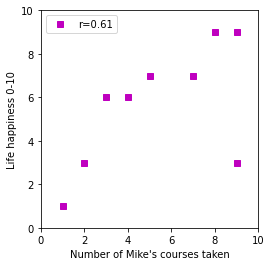

In [57]:
# CORRELATION COEFFICIENT - DO TWO SETS HAVE A LINEAR RELATIONSHIP?

# data
mikes_courses  = [4,5,8,2,9,9,1,3,7]
life_happiness = [6,7,9,3,9,3,1,6,7]

# mean-center
m = mikes_courses - np.mean(mikes_courses) #is this a list of deviations?
l = life_happiness - np.mean(life_happiness)

numerator = np.dot(m,l)
denominator = np.sqrt(np.dot(m,m)) * np.sqrt(np.dot(l,l))

r1 = numerator/denominator

r2 = np.corrcoef(m,l)[1,0]

print(r1)
print(r2)

plt.plot(mikes_courses,life_happiness,'ms',label='r=%s' %np.round(r1,2))
plt.axis([0,10,0,10])
plt.legend()
plt.gca().set_aspect('equal')
plt.xlabel('Number of Mike\'s courses taken')
plt.ylabel('Life happiness 0-10')
plt.show()

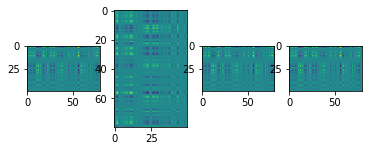

In [66]:
#Lect 140 my ans-
v1 = np.random.randn(50)
v2 = np.random.randn(80)

#np.dot(v1,v2) invalid- diff. lengths
# np.outer(v1,v2)- too large to print out

op = np.outer(v1,v2)
fp = np.outer(v2,v1)

op1 = 2*op
op2 = op*2
#op3 = v1*2*v2

fig,ax = plt.subplots(1,4)

ax[0].imshow(op)
ax[1].imshow(fp)
ax[2].imshow(op1)
ax[3].imshow(op2)
#ax[4].imshow(op3)
plt.show() #columns are all the first weighted by differnt numbers

In [67]:
v = np.arange(1,11)
w = np.arange(1,5)

print(np.outer(v,w))
print(np.outer(w,v))

#not matrix communtative because even with same numbers, rows/cols are opposites

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]
 [ 6 12 18 24]
 [ 7 14 21 28]
 [ 8 16 24 32]
 [ 9 18 27 36]
 [10 20 30 40]]
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]
 [ 3  6  9 12 15 18 21 24 27 30]
 [ 4  8 12 16 20 24 28 32 36 40]]


In [69]:
s = 4
res1 = s*np.outer(v,w)
res2 = np.outer(s*v,w) #doing arithm inside method is great part of python
res3 = np.outer(v,s*w)
res4 = np.outer(v,w)*s

print(res1-res2) # zeros means it's identical
print(res2-res3)
print(res3-res4)
print(res4-res2)
# all the same as scalar-multiplication-communtative

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [82]:
A = np.random.randn(14,10)
B = np.random.randn(14,10)
C = np.random.randn(10,14)
D = np.random.randn(10,14)

#A@B #how to multiply two matrices
print(np.shape(B@C))
B@C

(14, 14)


array([[ 0.18552078,  2.50965461, -0.01172526, -1.59146204, -3.03483316,
         0.9482757 , -3.1761789 , -3.29972748, -1.28962347,  5.71918826,
        -4.95308336,  2.3395381 , -6.04542929, -4.69142393],
       [ 1.72734054, -1.668109  , -1.40124148, -0.24602669, -0.70580545,
        -4.06274498, -1.56118642, -7.28373625, -1.36637676,  0.99589261,
        -0.98970635, -0.26721711,  3.55708293, -5.43472793],
       [ 1.96630379, -1.27942395,  2.94266433,  0.37287817, -0.36454577,
        -1.34747076,  1.40269028,  0.71006029,  5.19353462, -7.60235009,
         0.05039248, -3.54405603,  3.67798898,  3.275104  ],
       [ 0.08556488, 10.92595456,  2.63672866, -0.17342723,  0.12523204,
         0.20047583, -2.06110453,  3.07913739,  0.98826485,  4.80047568,
        -3.21230535,  2.33802879, -6.93792332,  6.1095402 ],
       [-0.08413601,  2.48815266, -4.51262196, -4.49697884,  0.51201304,
        -1.30043914, -0.6121477 , -1.57714767,  1.82025882,  5.24490279,
        -0.12153716,  4.61

In [85]:
A = np.random.randn(14,10)
B = np.random.randn(14,10)
C = np.random.randn(10,14)
D = np.random.randn(10,14)

def matmult(B,D):
    print(B[1])
    print(D[0])
    if len(B[1]) != len(D[0]):
        raise ValueError('Vectors must have equal inners')
    #v[i] * w[i]
    np.dot(B,D)
matmult(B,D)

[-0.48173626  0.784116   -0.58357955 -0.11753747 -0.77442906  1.19235798
  0.86711706  0.03436633 -1.33644314  0.52267633]
[ 0.21018406  0.63701394  0.89477337 -0.6479098  -0.13621468  1.39738989
 -0.1457717  -1.02761794 -0.26032831  0.6047045  -1.68489555 -2.17877612
  0.15554438  0.88044805]


ValueError: Vectors must have equal inners

In [98]:
A = np.random.randn(14,10)
C = np.random.randn(10,14)

def matrixMultiplication(A,C):
    #get matrix sizes
    szA = np.shape(A)
    szB = np.shape(C)
    #check sizes and give error if inners not same
    if szA[1]!=szB[0]:
        raise ValueError('Inner dimensions don\'t match')
        
    # initialize
    C = np.zeros((szA[0],szB[1]))
        
    # compute!
    for i in range(szA[0]):
        for j in range(szB[1]):
            D[i,j] = np.dot(A[i,:],C[:,j])
            
    return D
    
#D = matrixMultiplication(A,C)
D1 = A@C
print(D1)

[[-5.02637405e+00 -2.17254136e+00  3.91039718e+00  2.43183549e+00
  -4.79933025e+00  2.24792225e+00 -7.06771155e-01 -3.02116276e+00
  -2.27361240e+00  1.08321232e+00  5.69419674e-01  3.54623191e+00
   5.66417155e+00  3.51311407e+00]
 [ 3.85161406e+00  2.07658311e+00 -2.40987182e+00 -1.07083948e+00
   4.75191640e+00  3.49183156e-01  1.18873845e+00 -7.67714489e-01
   3.61764725e+00 -5.25815505e+00  1.14078881e+00 -8.24415162e-01
  -1.34981257e+00 -2.14433786e-01]
 [-2.94926118e+00  1.81062910e+00  1.14742439e+00  1.61896094e+00
   5.55891704e+00  2.87460058e+00  2.31173545e+00 -5.84183855e+00
   3.81076403e+00  6.46860671e-01  6.45661851e+00  5.65366606e+00
   4.55833265e-01 -1.86218712e-01]
 [ 2.51825365e+00 -3.84137062e-01 -1.39543907e-01  1.00579172e+00
  -5.45620982e+00  4.99429673e-01  1.57129335e+00 -3.09388223e+00
  -3.85828221e-01  1.80177051e+00 -7.47199673e+00 -7.81445447e-01
  -7.49256639e-03 -2.90061711e+00]
 [-2.35382046e+00  5.80976434e-01  3.11192164e+00  2.61115439e+00
  

In [3]:
r = np.random.randn(1,10)
rt1 = np.transpose(r)
rt2 = r.T
print(np.shape(r))
print(np.shape(rt1))
print(np.shape(rt2))


(1, 10)
(10, 1)
(10, 1)


In [7]:
mat = np.random.randn(8,4)
matT = mat.T
# matTT = matT.T*matT ValueError: 
#operands could not be broadcast together with shapes (8,4) (4,8)
fig,ax = plt.subplots(1,2)
ax[0].imshow(mat)
ax[0].set_title('M')
ax[1].imshow(matT)
ax[1].set_title('M$^T$')
# ax[2].imshow(matTT)

for i in ax:
    i.set_xticks([])
    i.set_yticks([])

plt.show()

ValueError: operands could not be broadcast together with shapes (8,4) (4,8) 

In [12]:
m = 14
n = 19

amat = np.random.randn(m,n)
# palindrome
amatama = amat@amat.T
# show that this is square
print(np.shape(amatama))
# show that this is symmetric
print(amatama)

(14, 14)
[[ 26.13465679  -1.28066943   0.47554042   0.88884575   9.83331249
    3.8356367   -0.22903838  -5.65985589   2.40483381  -3.98726173
   -3.80051494   5.79541342  -7.9100468    3.38509081]
 [ -1.28066943  15.8699992   -2.71264967   4.87938455  -1.95189475
    0.8833173    3.30696552  -3.24528937  -3.88155506  -0.37570101
   -3.76576979   0.54840031  -0.85955955   4.67581809]
 [  0.47554042  -2.71264967  17.59001924  -3.85937585   1.31485532
    0.7931829   -3.67048218   4.94649755  -5.29467141  -3.54442657
  -10.22956436   9.4546937    1.56477568   0.43917197]
 [  0.88884575   4.87938455  -3.85937585   9.24900263  -0.32668668
    0.54205974   2.68317621   1.60847926  -2.14046144   3.07374494
   -3.64369914   1.08377609   1.08681648  -2.41758038]
 [  9.83331249  -1.95189475   1.31485532  -0.32668668  25.01097072
   12.20626301  -3.76292012   0.39834663  -0.25583637  -4.07677093
    2.10132587   3.43234856  -2.89451447  -1.20693924]
 [  3.8356367    0.8833173    0.7931829    0.5

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1 0 0 0 0]
 [0 4 0 0 0]
 [0 0 6 0 0]
 [0 0 0 3 0]
 [0 0 0 0 0]]
[1 4 6 3 0]
[[ 0.06444575  0.7447221  -0.2147502  -2.53544664  0.65439674 -0.81909298
   1.03390505 -1.52815699  2.50675654  1.26995701 -0.76166643 -0.84702514
   0.07369725 -0.42692998 -0.6015177 ]
 [ 0.          1.69465801  1.51773415 -1.28094635  0.18101944 -0.21411355
   0.57565739 -0.41805286 -1.40323902  0.58237767 -0.57305675  0.97119653
   0.93195386  0.14767841 -1.14600313]
 [ 0.          0.         -0.50540468 -2.41024845 -0.04414445  0.28828672
  -0.25010162 -0.20779221  1.15010321 -1.02730577 -1.06310755  0.19058298
   0.26448671 -0.95409205  0.2687398 ]
 [ 0.          0.          0.         -0.5119776   0.32093612  0.71587222
   0.73023165 -0.31920758 -0.50064437  0.5

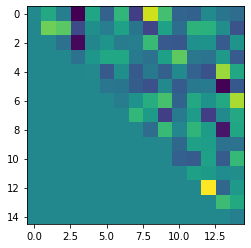

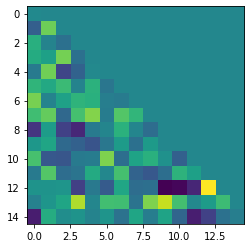

In [13]:
#Special shaped matrices:
I = np.eye(7) #must be symmetrical
print(I)
Z = np.zeros((5,4)) #requires a tuple, so double ()
print(Z)
D = np.diag([1,4,6,3,0])
print(D)
d = np.diagonal(D) #only outputs the numbers on the diagonal
print(d)
T = np.random.randn(15,15)
print(np.triu(T)) #upper triangular
plt.imshow(np.triu(T))
plt.show()
plt.imshow(np.tril(T))

In [17]:
intmat = np.random.randint(-4,5,(4,4))
print(intmat)
I4 = np.eye(4)
upper4 = np.triu(np.random.randn(4,4))
print(intmat)
print('\n')
print(intmat@I4)
print(intmat.dtype)
print((intmat@I4).dtype)
print((intmat@upper4))
#Matrix x its identity matrix is same.

#My thoughts-
# M = np.random.randn(-4,4)
# I = np.eye(8)
# N = M*I
# print(N)
# print(np.triu(M))


[[-3  3  2 -1]
 [-1 -2  1 -1]
 [ 4  4 -2 -1]
 [-3 -2 -3 -1]]
[[-3  3  2 -1]
 [-1 -2  1 -1]
 [ 4  4 -2 -1]
 [-3 -2 -3 -1]]


[[-3.  3.  2. -1.]
 [-1. -2.  1. -1.]
 [ 4.  4. -2. -1.]
 [-3. -2. -3. -1.]]
int64
float64
[[-2.06915682 -9.66508668 -2.49749663  4.17986362]
 [-0.68971894  3.11869093  0.9488384   4.46774754]
 [ 2.75887576 -4.02091506 -1.60883984 -9.83681817]
 [-2.06915682  0.90222413  1.14497959 -4.50017001]]


[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


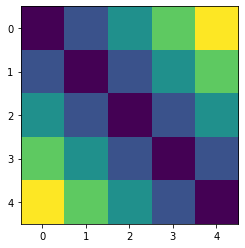

In [20]:
from scipy.linalg import toeplitz
toe = toeplitz(np.arange(1,6))
print(toe)
plt.imshow(toe)

[[ 3  3 -4 -3 -4]
 [-1 -1  1 -3  4]
 [-3 -3 -3  2  4]
 [-5 -5 -5 -3  0]
 [-5 -5  2 -5 -1]]
[[ 0.11313519 -0.03930968  0.1835365  -0.15874538  0.12436653]
 [ 0.17545542  0.06615532  0.11272428 -0.18928914  0.01369675]
 [-0.12559923  0.01821668 -0.14080263 -0.00657444  0.01205314]
 [-0.23394056 -0.08820709 -0.19791809  0.20476647 -0.20873853]
 [ 0.04122723  0.14669223  0.14436379 -0.09053554 -0.00068484]]


AttributeError: 'AxesSubplot' object has no attribute 'inshow'

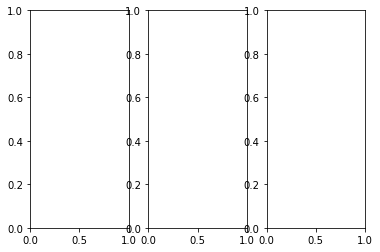

In [23]:
m = 5
A = np.random.randint(-5,5,(m,m))
Ainv = np.linalg.inv(A)
A[:,0] = A[:,1]
print(A)
print(Ainv)
fig,ax = plt.subplots(1,3)
ax[0].inshow(A)
ax[0].set_title('A')
ax[1].imshow(Ainv)
ax[1].set_title('A$^{-1}$')
ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{-1}$')
plt.show()

[[ 2  2 -3  2  1  0 -5]
 [ 1  1  4 -5 -5 -3  0]
 [-1 -1 -5  4 -3 -4 -1]
 [-1 -1 -5 -3  2 -1  1]
 [-1 -1  2  5  3 -5  2]]
[[ 0.07369036  0.03023654 -0.03257498 -0.00544842  0.01043358]
 [ 0.07369036  0.03023654 -0.03257498 -0.00544842  0.01043358]
 [-0.00957401  0.03367163 -0.06211509 -0.0789668   0.04474626]
 [-0.01202052 -0.07217228  0.0592578  -0.10762093  0.01773855]
 [ 0.06723011 -0.02865413 -0.11280103  0.08841731  0.08955329]
 [-0.0556544  -0.10023612 -0.01529806 -0.07691532 -0.11220233]
 [-0.12666549 -0.03061348  0.01235198  0.01765644  0.00650519]]


ValueError: operands could not be broadcast together with shapes (5,7) (7,5) 

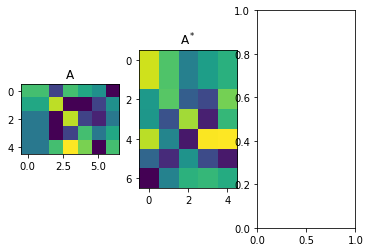

In [32]:
m = 5
A = np.random.randint(-m,m+1,(m,m+2))
A[:,0] = A[:,1]
print(A)
Apinv = np.linalg.pinv(A)
print(Apinv)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Apinv)
ax[1].set_title('A$^*$')

ax[2].imshow(A*Apinv)
ax[2].set_title('AA$^*$')

In [2]:
X = np.array([[2,1,-1],[3,4,2],[1,-5,-2]])
y = np.array([1,13,0])
beta1 = np.linalg.inv(X.T@X)@(X.T@y)
print(beta1)

beta2 = np.linalg.solve(X,y)
print(beta2)

[ 3. -1.  4.]


[4. 6.]


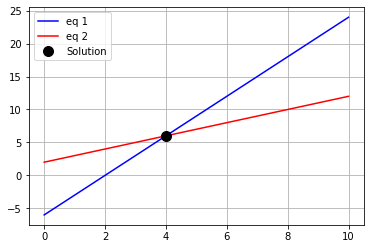

In [7]:
#LECT 146 SOLVING A SYSTEM OF EQUATIONS

# 3x(1)-y(1)=6
# -x(1)+y(1)=2

#3x(2)-y(2)=6
#1.5x(2)-.5y(2)=3

#3x(3)-y(3)=6
#1.5x(3)-.5y(3)=2

X1 = np.array([[3,-1],[-1,1]])
y1 = np.array([6,2])

X2 = np.array([[3,-1],[1.5,-.5]])
y2 = np.array([6,3])

X3 = np.array([[3,-1],[1.5,-.5]])
y3 = np.array([6,2])

xlim = np.array([0,10])

# 1)
# convert to y = mx + b
yy1 = -X1[0,0]/X1[0,1]*xlim+y1[0]/X1[0,1]
yy2 = -X1[1,0]/X1[1,1]*xlim+y1[1]/X1[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r',label='eq 2')

# solve the system
b = np.linalg.solve(X1,y1)
print(b)
plt.plot(b[0],b[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()


LinAlgError: Singular matrix

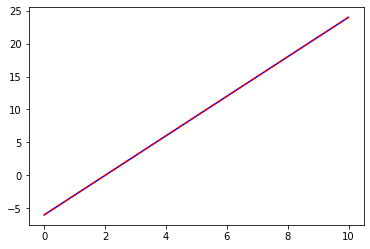

In [10]:
# 1)
# convert to y = mx + b
yy1 = -X2[0,0]/X2[0,1]*xlim+y2[0]/X2[0,1]
yy2 = -X2[1,0]/X2[1,1]*xlim+y2[1]/X2[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r--',label='eq 2')

# solve the system
b = np.linalg.solve(X2,y2)
print(b)
plt.plot(b[0],b[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

LinAlgError: Singular matrix

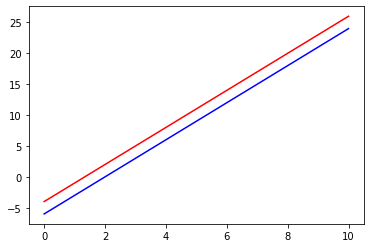

In [12]:
# 1)
# convert to y = mx + b
yy1 = -X3[0,0]/X3[0,1]*xlim+y3[0]/X3[0,1]
yy2 = -X3[1,0]/X3[1,1]*xlim+y3[1]/X3[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r',label='eq 2')

# solve the system
b = np.linalg.solve(X3,y3)
print(b)
plt.plot(b[0],b[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

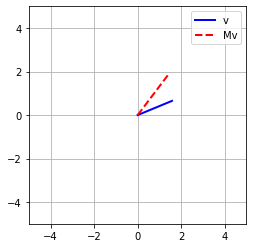

In [22]:
#LECT 147 MATRIX/VECTOR MULTIPLICATION
M = np.array([[.5,1],[1,.5]])
v = np.array([1,2])
v = np.random.randn(2)
Mv = M@v
plt.plot([0,v[0]],[0,v[1]],'b',linewidth=2,label='v')
plt.plot([0,Mv[0]],[0,Mv[1]],'r--',linewidth=2,label='Mv')
plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()
plt.legend()
plt.show()

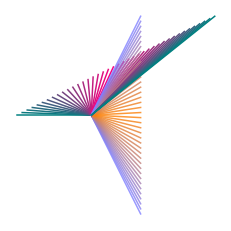

In [27]:
vcomp = np.linspace(-2,2,40)
for a in vcomp:
    v = np.array([1,a])
    Mv = M@v
    plt.plot([0,v[0]],[0,v[1]],color=[1-abs(a)/4,.5,abs(a)/2],alpha=.8)
    plt.plot([0,Mv[0]],[0,Mv[1]],color=[1-abs(a)/2,abs(a)/4,.5])
    
plt.axis('square')
plt.axis('off')
plt.show()

[105.31475869  64.81713221  32.88590297  13.94488598   8.03732015]


Text(0.5, 1.0, 'Eigenvectors')

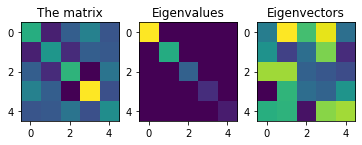

In [34]:
# Eigenvalues and eigenvectors
M = np.random.randint(-5,6,(5,5))
M = M@M.T

eigvals,eigvecs = np.linalg.eig(M)
fig,ax = plt.subplots(1,3)
ax[0].imshow(M)
ax[0].set_title('The matrix')
ax[1].imshow(np.diag(eigvals))
print(eigvals)
ax[1].set_title('Eigenvalues')
ax[2].imshow(eigvecs)
ax[2].set_title('Eigenvectors')
plt.show()

In [36]:
Mv = M@eigvecs[:,0]
lv = eigvals[0]*eigvecs[:,0]
print(Mv)
print(lv)

[-22.46662782  -8.61651822  47.36138548 -90.33558266  10.42047583]
[-22.46662782  -8.61651822  47.36138548 -90.33558266  10.42047583]


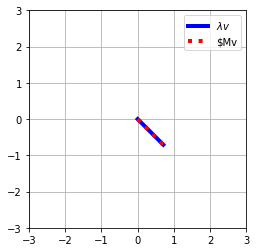

In [42]:
#LECT 149 ans-
M = np.array([[1,2],[2,1]])
d,V = np.linalg.eig(M)

lv = d[1]*V[:,1]
Mv = M@V[:,1]
plt.plot([0,lv[0]],[0,lv[1]],'b',label='$\\lambda v$',linewidth=4)
plt.plot([0,lv[0]],[0,lv[1]],'r:',label='$Mv',linewidth=4)
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.legend()
plt.grid()
plt.show()

In [50]:
m = 6
Q = np.random.randn(m,m)
Q = Q@Q.T
d,V = np.linalg.eig(Q)

dps = np.zeros((m,m))

for i in range(m):
    for j in range(0,m):
        dps[i,j] = np.dot(V[:,i],V[:,j])
        
print(np.round(dps,5))

[[ 1. -0.  0.  0. -0. -0.]
 [-0.  1.  0. -0.  0.  0.]
 [ 0.  0.  1.  0. -0. -0.]
 [ 0. -0.  0.  1. -0. -0.]
 [-0.  0. -0. -0.  1.  0.]
 [-0.  0. -0. -0.  0.  1.]]


[1 3 2 4 0]
(405, 314)


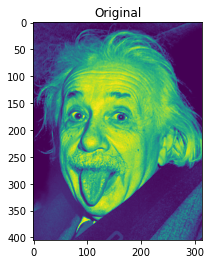

(405, 314)
(405, 405)


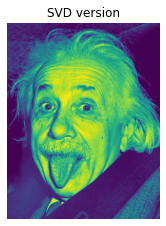

In [90]:
#shuffle the order of the singular values-
randorder = np.random.permutation(len(s))
print(np.random.permutation(5))

ein = Image.open('einstein.jpg')
ein = np.mean(ein,2)
print(np.shape(ein))
plt.title('Original')
plt.imshow(ein)
plt.show()

#S = np.diag(s)
S = np.zeros(np.shape(ein))
for i in range(0,314):
    S[i,i] = s[i]
print(np.shape(S))
print(np.shape(U))
rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(rein)
plt.axis('off')
plt.title('SVD version')
plt.show()

(405, 405)
(314,)
(314, 314)


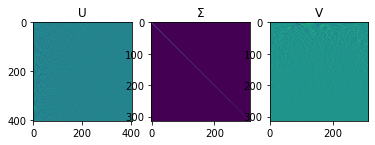

In [61]:
U,s,V = np.linalg.svd(ein)
print(np.shape(U))
print(np.shape(s))
print(np.shape(V))
fig,ax = plt.subplots(1,3)
ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V')
plt.show()

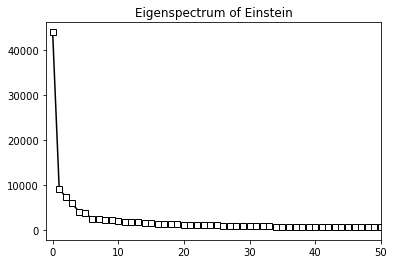

In [64]:
plt.plot(s, 'ks-',markerfacecolor='w')
plt.xlim([-1,50])
plt.title('Eigenspectrum of Einstein')
plt.show()

(405, 314)
(405, 405)


<ipython-input-65-de1a1ef53210>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


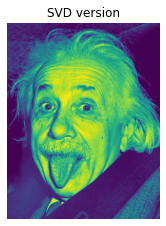

In [65]:
#S = np.diag(s)
S = np.zeros(np.shape(ein))
for i in range(0,len(s)):
    S[i,i] = s[i]
print(np.shape(S))
print(np.shape(U))
rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(rein)
plt.axis('off')
plt.title('SVD version')
plt.show()